![logo](logo-angellist.png)

In [37]:
import bs4 as bs
import pandas as pd
import time

from datetime import datetime
import numpy as np
import re
from matplotlib import pyplot as plt
import random

from geopy.geocoders import Nominatim

import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

pd.options.display.max_colwidth = 50
pallet = ['#D61A46', '#FDDC22', '#236AB9', '#342E09']

In [118]:
#read and import data
df = pd.read_pickle('startups_processed.pickle')
print(df.shape)
df.head()

(10139, 23)


,joined,kind,link,location,market,name,pitch,raised,size,stage,...,tech,min_size,lifetime,raised_month,k_raised,m_raised,b_raised,latitude,longitude,address
0,2010-07-01,startup,https://angel.co/vufind-1,berkeley,enterprise resource planning,vufind (dba deepvu),deep learning as a service for maximizing marg...,680000.0,11-50,seed,...,python,11,105,6476.190476,680.0,0.680,0.000680,NaN,-122.272864,None
1,2010-12-01,startup,https://angel.co/nmodes,toronto,customer service,nmodes,nmodes creates artificial intelligence solutio...,100000.0,1-10,seed,...,python,1,100,1000.000000,100.0,0.100,0.000100,43.653963,-79.387207,None
2,2012-01-01,startup,https://angel.co/tagasauris,santa monica,data mining,tagasauris,video search and discovery platform,1000000.0,1-10,seed,...,python,1,86,11627.906977,1000.0,1.000,0.001000,34.025072,-118.496513,None
3,2012-04-01,startup,https://angel.co/zoemob,san francisco,location based services,zoemob,global family assistant,800000.0,1-10,seed,...,python,1,83,9638.554217,800.0,0.800,0.000800,37.779281,-122.419236,None
4,2012-11-01,startup,https://angel.co/encorealert,san francisco,machine learning,encore,the first automated data scientist for markete...,987000.0,1-10,seed,...,python,1,76,12986.842105,987.0,0.987,0.000987,37.779281,-122.419236,None


In [69]:
df.dtypes

joined          datetime64[ns]
kind                    object
link                    object
location                object
market                  object
name                    object
pitch                   object
raised                 float64
size                    object
stage                   object
website                 object
query                   object
type_                   object
tech                    object
min_size                object
lifetime                 int64
raised_month           float64
k_raised               float64
m_raised               float64
b_raised               float64
latitude               float64
longitude              float64
address                 object
dtype: object

In [40]:
#output cluster map

def cluster_map(df, popup_col=None):
    
    if popup_col:
        map_df = df[['latitude', 'longitude', popup_col]].dropna()
    else:
        map_df = df[['latitude', 'longitude']].dropna()
        
    cmap = folium.Map(location=[map_df.latitude.median(), map_df.longitude.median()], zoom_start=5,)
    marker_cluster = MarkerCluster().add_to(cmap)
    
    for index, row in map_df.iterrows():
        lat = row['latitude']
        lon = row['longitude']
        try: popup = row[popup_col]
        except: popup = None

        folium.Marker(location=[lat, lon], popup=popup, 
                      icon=folium.Icon(color='blue', icon='info-sign')).add_to(marker_cluster)

    return cmap

cmap = cluster_map(df, popup_col='website')
cmap.save('clustermap.html')

In [41]:
#output heat map

def heat_map(df):
    map_df = df[['latitude', 'longitude']].dropna()
    hmap = folium.Map(location=[map_df.latitude.median(), map_df.longitude.median()], zoom_start=2,)
    heat = map_df.as_matrix().tolist()
    hmap.add_children(HeatMap(heat))
    return hmap

hmap = heat_map(df)
hmap.save('heatmap.html')

C:\Users\vlad_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\vlad_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


In [42]:
#output weighted heat map

def heat_wmap(df):
    map_df = df[['latitude', 'longitude', 'm_raised']].dropna()
    hmap = folium.Map(location=[map_df.latitude.median(), map_df.longitude.median()], zoom_start=2,)
    heat = map_df.as_matrix().tolist()
    hmap.add_children(HeatMap(heat))
    return hmap

hwmap = heat_wmap(df)
hwmap.save('heatmap_weighted.html')

C:\Users\vlad_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\vlad_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


In [103]:
#top-30 startups by money raised (billions)

df[['b_raised', 'website']].sort_values(by=['b_raised'], ascending=False).head(30)

,b_raised,website
9581,10.333560,airbnb.com
9583,4.200000,netscape.aol.com
9590,3.280000,nest.com
6781,2.129200,palantir.com
6498,1.700000,grail.com
6205,1.176000,cloudera.com
6816,1.038900,climate.com
1607,1.018800,getcruise.com
9594,1.000000,aol.com
1830,0.999000,corp.meitu.com


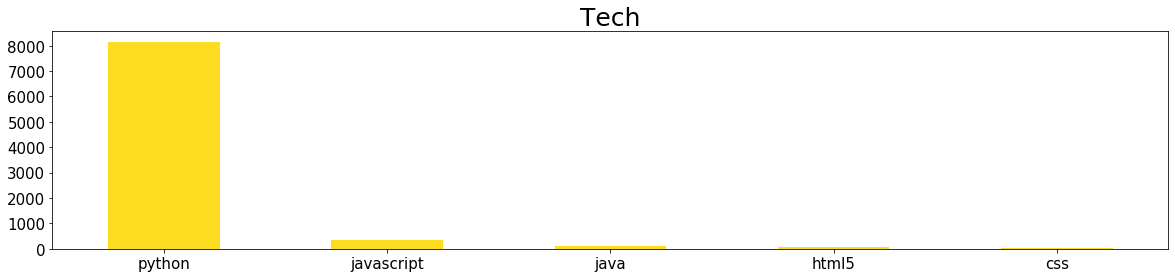

In [74]:
#startups grouped by tech used

tech_counts = df.groupby('tech').count().name.sort_values(ascending=False)

fig = plt.figure(figsize=[20,4])
plt.title('Tech', fontsize=25)
tech_counts.plot(kind='bar', color=random.choice(pallet), fontsize=15, rot=0)
plt.xlabel('')
plt.show()

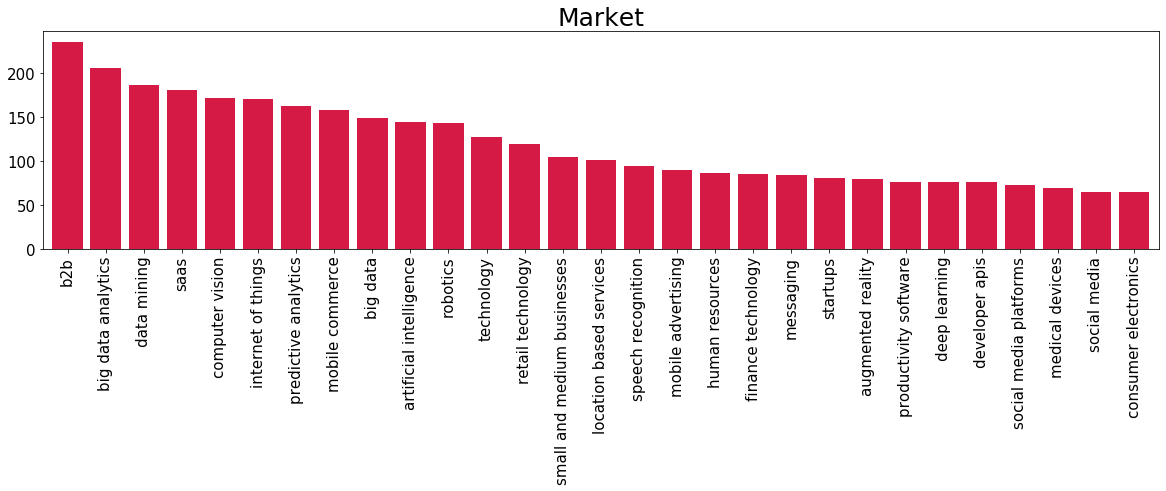

In [75]:
#grouped by market-type

market_counts = df.groupby('market').count().name.sort_values(ascending=False).iloc[:30]
market_counts = market_counts[market_counts.index != ''].sort_values(ascending=False)
fig = plt.figure(figsize=[20,4])
plt.title('Market', fontsize=25)
market_counts.plot(kind='bar', color=random.choice(pallet), fontsize=15, width=0.8)
plt.xlabel('')
plt.show()

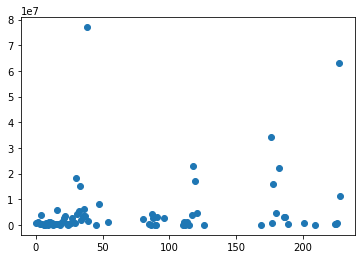

In [77]:
#money raised in 1e7 for B2B startups

b2b_dist = df[df.market == 'b2b'].reset_index(drop=True)
plt.scatter(b2b_dist.index, b2b_dist.raised)
plt.show()

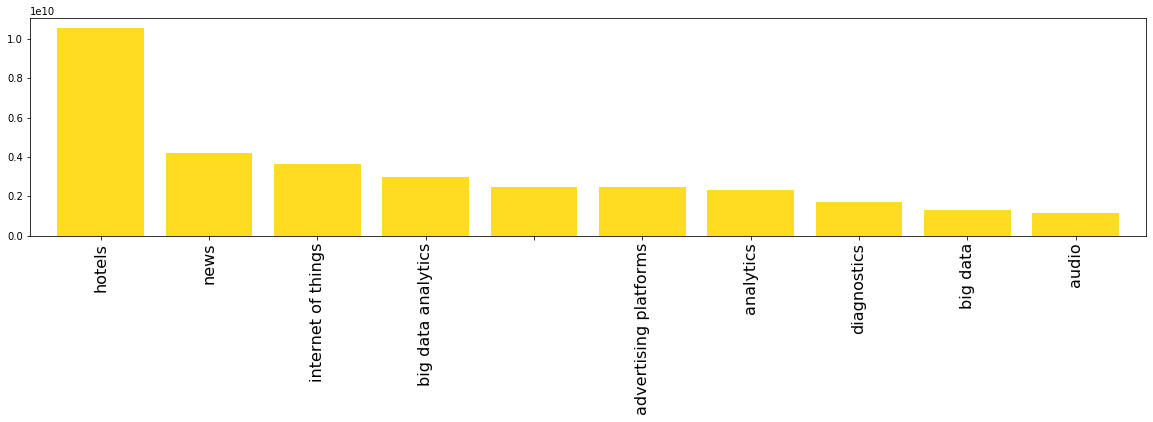

In [79]:
# market type vs SUM_TOTAL of money raised in 1e10

fig = plt.figure(figsize=[20,4])
plt.xticks(fontsize=16)
market_sum = df.groupby('market').sum().raised.nlargest(10)
market_sum.plot(kind='bar', color=random.choice(pallet), width=0.8)
plt.xlabel('')
plt.show()

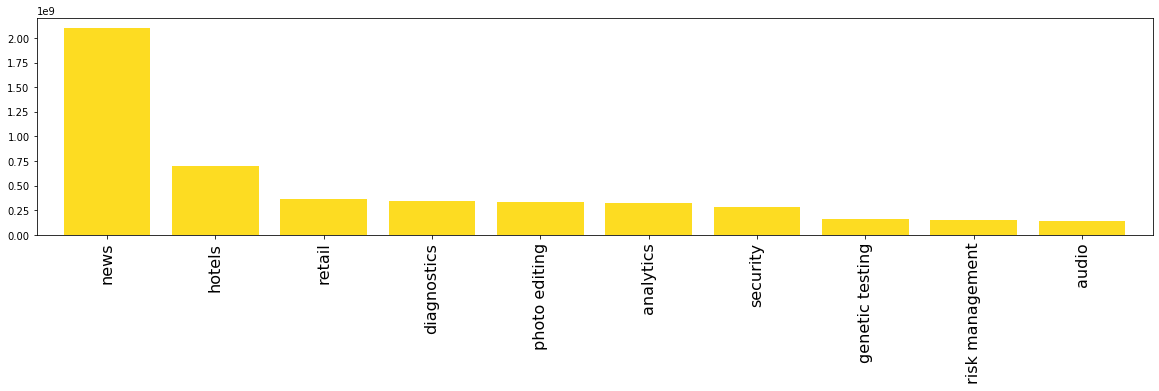

In [80]:
#market type vs MEAN of money raised in 1e9
fig = plt.figure(figsize=[20,4])
plt.xticks(fontsize=16)
market_mean = df.groupby('market').mean().raised.nlargest(10)
market_mean.plot(kind='bar', color=random.choice(pallet), width=0.8)
plt.xlabel('')
plt.show()

In [83]:
#website count for "news" market-type

df[df.market == 'news'].website

618            haystack.tv
2403          blurbity.com
2718           vistkar.com
5746    newsfederation.org
7763           mapicle.com
7790        majhapaper.com
9583      netscape.aol.com
Name: website, dtype: object

In [119]:
#charting market-types by market-size

bins=[0, 1e6, 10e6, 50e6, 100e6, 1000e6]
groups = df.groupby(['market', pd.cut(df.raised, bins)])
market_bins = groups.count().name.unstack()
market_bins.columns = ['1M', '1-10M', '10-50M', '50-100M', '100-1000M'] 
market_bins = market_bins[market_bins.index != '']

market_sum = df.groupby('market').sum().raised.sort_values(ascending=False).iloc[:50]

trace_1 = go.Bar(x=market_bins['1M'].nlargest(50).index.tolist(), 
                 y=market_bins['1M'].nlargest(50).tolist(), visible=True)

trace_10 = go.Bar(x=market_bins['1-10M'].nlargest(50).index.tolist(), 
                  y=market_bins['1-10M'].nlargest(50).tolist(), visible=False)

trace_50 = go.Bar(x=market_bins['10-50M'].nlargest(50).index.tolist(), 
                  y=market_bins['10-50M'].nlargest(50).tolist(), visible=False)

trace_100 = go.Bar(x=market_bins['50-100M'].nlargest(50).index.tolist(), 
                   y=market_bins['50-100M'].nlargest(50).tolist(), visible=False)

trace_1000 = go.Bar(x=market_bins['100-1000M'].nlargest(50).index.tolist(), 
                    y=market_bins['100-1000M'].nlargest(50).tolist(), visible=False)

data = [trace_1, trace_10, trace_50, trace_100, trace_1000]

button_1 =  dict(label='1M', method='update', 
                 args = [{'visible': [True, False, False, False, False]},
                 {'title': '1M'}])

button_10 =  dict(label='1-10M', method='update', 
                 args = [{'visible': [False, True, False, False, False]},
                 {'title': '1-10M'}])

button_50 =  dict(label='10-50M', method='update', 
                 args = [{'visible': [False, False, True, False, False]},
                 {'title': '10-50M'}])

button_100 =  dict(label='50-100M', method='update', 
                 args = [{'visible': [False, False, False, True, False]},
                 {'title': '50-100M'}])

button_1000 =  dict(label='100-1000M', method='update', 
                 args = [{'visible': [False, False, False, False, True]},
                 {'title': '100-1000M'}])


updatemenus = list([dict(type="buttons", active=-1, buttons=[button_1, button_10, button_50, 
                                                             button_100, button_1000])])

layout = dict(title='Investment By Market', showlegend=False, updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
pio.write_html(fig, file='update_button.html', auto_open=True)


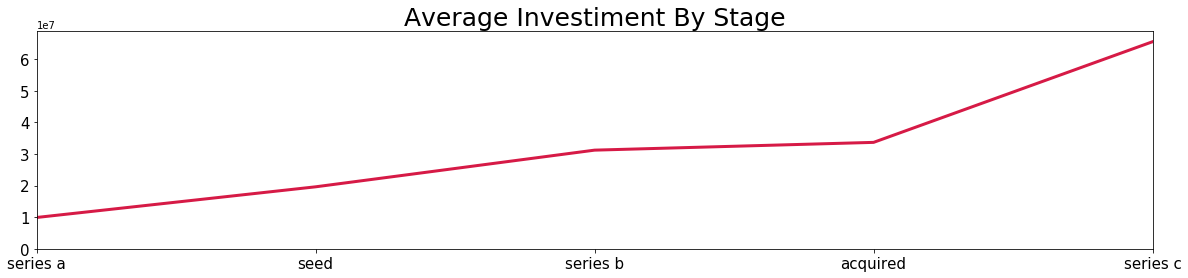

In [98]:
#stage vs investment

fig = plt.figure(figsize=[20,4])
stage_sum = df.groupby('stage').mean().raised.nsmallest(10)


stage_sum.plot(kind='bar', color='w')
stage_sum.plot(color=random.choice(pallet), linewidth=3, fontsize=15)
plt.xlabel('')
plt.title('Average Investiment By Stage', fontsize=25)
plt.show()

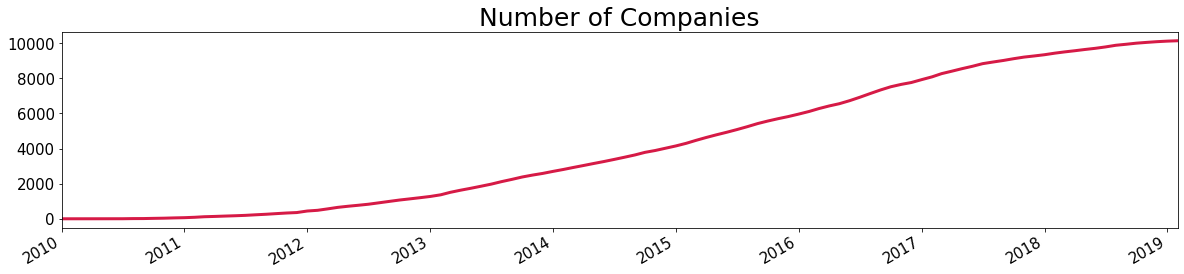

In [99]:
#company count vs date

date_counts = df.groupby('joined').count().name.cumsum()
fig = plt.figure(figsize=[20,4])
plt.title('Number of Companies', fontsize=25)
date_counts.plot( color=random.choice(pallet), fontsize=15, linewidth=3)
plt.xlabel('')
plt.show()

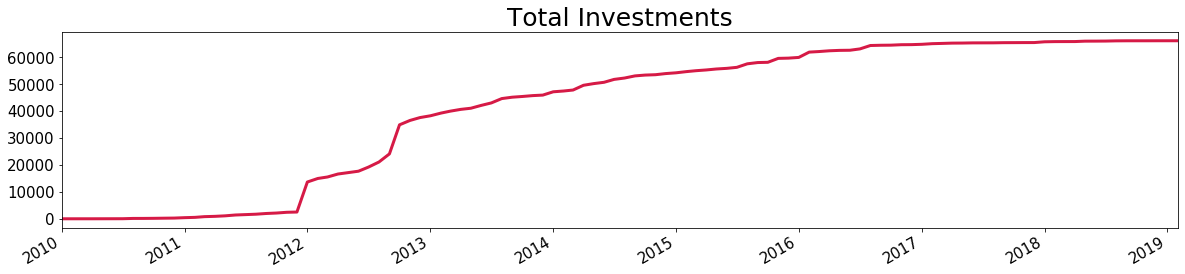

In [100]:
#total investments vs date

date_raised = df.groupby('joined').sum().m_raised.cumsum()
fig = plt.figure(figsize=[20,4])
plt.title('Total Investments', fontsize=25)
date_raised.plot( color=random.choice(pallet), fontsize=15, linewidth=3)
plt.xlabel('')
plt.show()

In [120]:
df.to_csv('startup_data.csv')